<a href="https://colab.research.google.com/github/haishan-shi/A1/blob/master/A2_Practical_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Machine learning is applied in many fields all over the world. It is getting more and more popular in Healthcare Industry. Machine learning is more likely to playing a crucial role in predicting heart diseases and other incurable diseases. If predicted well in advance in these diseases, prediction information can provide doctors with significant and detailed insights, and then they can adjust the basis of their diagnosis and treatment for each patient.

In this report, it will discuss a project in which machine learning algorithms are used to predict patients' potential heart disease. The algorithm includes K-Neighborhood Classifier, Support Vector Classifier, Decision Tree Classifier and Random Forest Classifier. The data set taken from Kaggle, which is used to predict patients' potential heart disease and analyse the probability of heart disease between male and female.

# Expoloration

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Import data set**

My first dataset has been downloaded from Kaggle, and I saved it as a local csv file named heart.csv. Next, I used uploaded local csv file to read the first dataset and save it to the heart variable.

In [2]:

#load data 
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "heart.csv" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "heart.csv" with length 38114 bytes


In [0]:
heart = pd.read_csv('heart.csv')

In [22]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


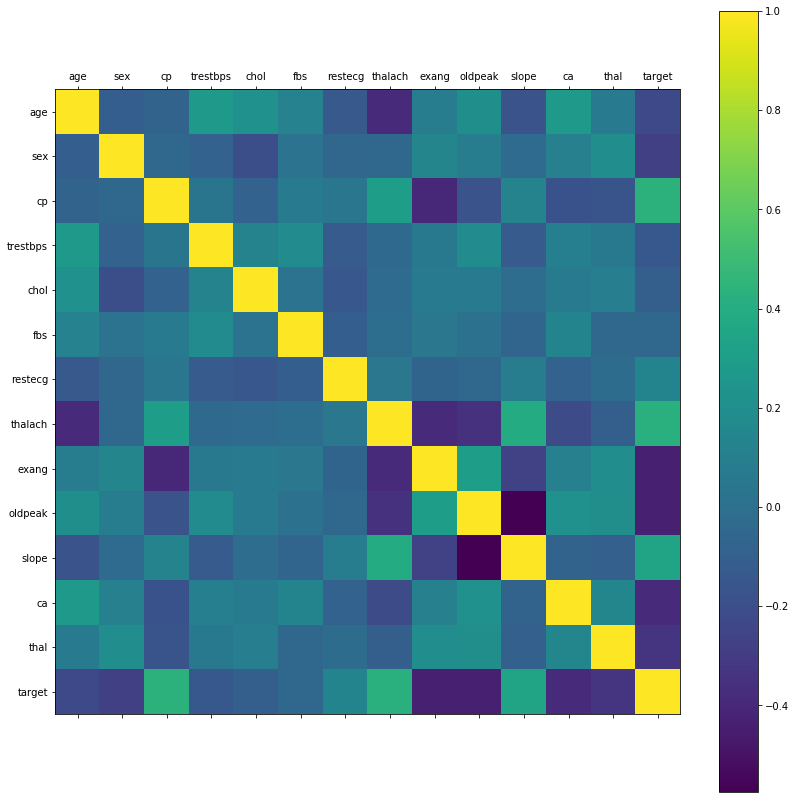

In [6]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(heart.corr())
plt.yticks(np.arange(heart.shape[1]), heart.columns)
plt.xticks(np.arange(heart.shape[1]), heart.columns)
plt.colorbar()

**Correlation Matrix**

It can be seen that there is no single feature with a very high correlation related to our target value. Also, features with the target value are showing   negative and positive correlation.

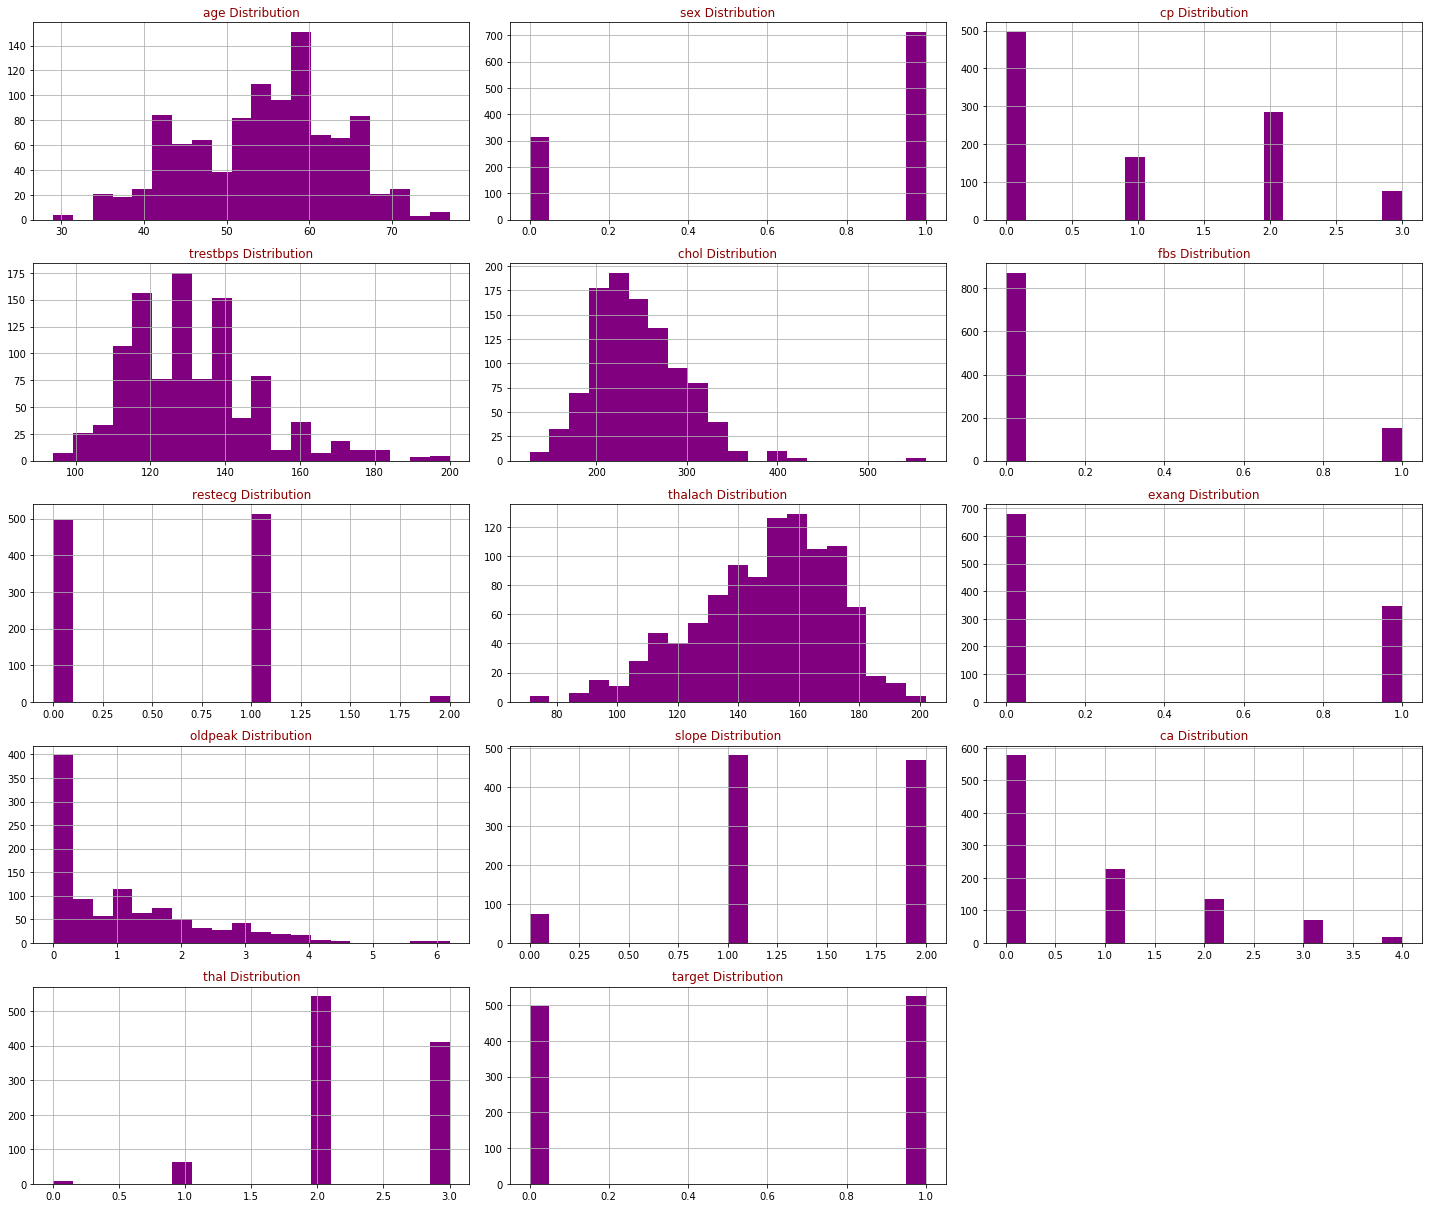

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='purple')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart,heart.columns,6,3)

**Data Processing**

1. As these histograms shown, it can be seen how each feature and label are distributed with different ranges, which highly defines the essentials of scaling. In addition, each categorized variable is described by each discrete bar. 
2. Column target 0 for disease-free and 1 for disease.
3. Column sex 1 for Male and 0 for Female.

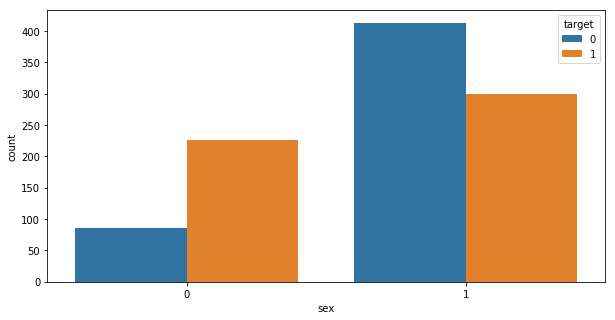

In [24]:
rcParams['figure.figsize'] = 10,5
sn.countplot(x='sex',hue='target',data=heart)

In [33]:
heart.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [32]:
heart.target.value_counts()

1    719
0    507
dtype: int64

In [26]:
heart.target.value_counts()
diseased=(len(heart[heart.target==1])/len(heart.target))*100
diseased_male=len(heart[(heart.target==1) & (heart.sex==1)])/len(heart.target)*100
diseased_female=len(heart[(heart.target==1) & (heart.sex==0)])/len(heart.target)*100

print("{:.2f}% of the total count were diseased, amoung which {:.2f}% were male and {:.2f}% were female".format(diseased,diseased_male,diseased_female))

non_diseased=(len(heart[heart.target==0])/len(heart.target))*100
non_diseased_male=len(heart[(heart.target==0) & (heart.sex==1)])/len(heart.target)*100
non_diseased_female=len(heart[(heart.target==0) & (heart.sex==0)])/len(heart.target)*100
print("\n{:.2f}% of the total count were  not diseased, amoung which {:.2f}% were male and {:.2f}% were female".format(non_diseased,non_diseased_male,non_diseased_female))

51.32% of the total count were diseased, amoung which 29.27% were male and 22.05% were female

48.68% of the total count were  not diseased, amoung which 40.29% were male and 8.39% were female


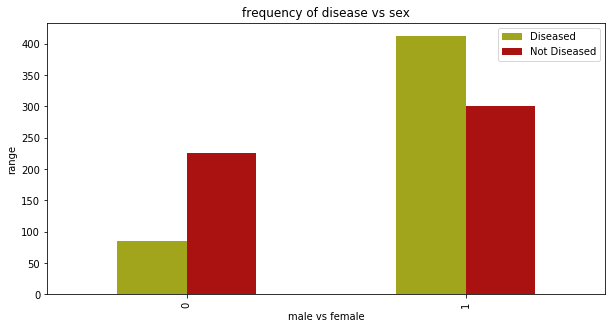

In [28]:
pd.crosstab(heart.sex, heart.target).plot(kind="bar",figsize=(10,5),color=['#a0a51c','#AA1111' ])
plt.title("frequency of disease vs sex")
plt.ylabel('range')
plt.xlabel('male vs female')
plt.legend(["Diseased","Not Diseased"])
plt.show()

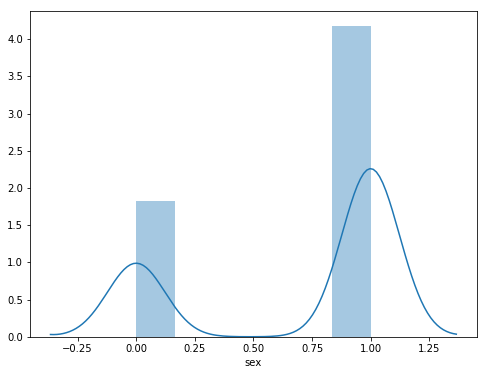

In [36]:
sn.distplot(heart["sex"])

**Result**

It is shown that : **a)** 51.32% of the total count were diseased, amoung which 29.27% were male and 22.05% were female. **b)** 48.68% of the total count were  not diseased, amoung which 40.29% were male and 8.39% were female

As a result, referenced a) and b),  male diseased is higher than female.

In [9]:
heart.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0.5, 1.0, 'Count of each Target Class')

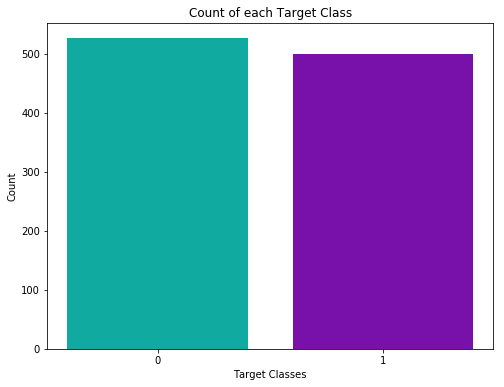

In [37]:
#For x-axis I used the unique() values from the target column and then set their
#name using xticks. For y-axis, I used value_count() to get the values for each class. 
#I colored the bars as blue and purple.

rcParams['figure.figsize'] = 8,6
plt.bar(heart['target'].unique(), heart['target'].value_counts(), color = ['#11aaa0', '#7711aa'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

It can be seen that 0 value is slightly greater than 1 value. They are almost balanced, which helps continue train the data.

# Methodology

To deal with classification variables, it needs decompose each classification column into dummy columns with 1s and 0s.
Suppose we have a "sex" column with a male value of 1 and a female value of 0. It needs to be converted to two columns, with a value of 1, a value of true, a value of 0, and a value of false. Example shown as below.

In [0]:

# Original Columm
# |    sex   |
# |     1    |
# |     1    |
# |     0    |

# Dummy Columns
# |    sex_0   ||    sex_1   |
# |      0     ||      1     |
# |      0     ||      1     |
# |      1     ||      0     |

heart = pd.get_dummies(heart, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart[columns_to_scale] = standardScaler.fit_transform(heart[columns_to_scale])


In [2]:
heart.head()

NameError: ignored

In [0]:
y = heart['target']
X = heart.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.66, random_state = 0)

In [0]:
knn_scores = []
for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

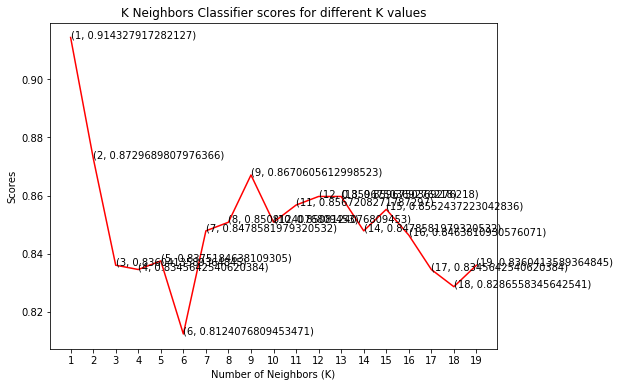

In [47]:
plt.plot([k for k in range(1, 20)], knn_scores, color = 'red')
for i in range(1,20):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')